# Task 5. Converting ODE to State Sapce representation

We need to convert:
$a_{k}y^{(k)} + a_{k-1}y^{(k-1)} + ... + a_{2}y^{\prime\prime} + a_{1}y^{\prime} + a_{0}y = b_0$

To: $X^{\prime} = AX + B$

**Solution**:

Express the highest order derivative: 
$$y^{k} = \frac{b_0}{a_k} - \frac{a_{k-1}}{a_k}y^{(k-1)} - ... - \frac{a_{2}}{a_k}y^{\prime\prime} - \frac{a_{1}}{a_k}y^{\prime} - \frac{a_{0}}{a_k}y $$

Declare 
$$X = \begin{bmatrix}  y \\ ... \\ y^{(k-2)} \\ y^{(k-1)} \end{bmatrix} and \ \ X^{\prime} = \begin{bmatrix}  y^{\prime} \\ ... \\ y^{(k-1)} \\ y^{(k)} \end{bmatrix}$$

And, finally

$\begin{bmatrix}  y^{\prime} \\ y^{\prime\prime}\\... \\ y^{(k-1)} \\ y^{(k)} \end{bmatrix} = \begin{bmatrix}  0 & 1 & 0 & 0 & ... & 0 \\ 0 & 0 & 1 & 0 & ... & 0 \\... & ... & ... & ... & ... & ... \\ 0 & 0 & 0 & 0 & ... & 1 \\ -\frac{a_0}{a_k} & -\frac{a_1}{a_k} & -\frac{a_2}{a_k} & -\frac{a_3}{a_k} & ... & -\frac{a_{k-1}}{a_k}\end{bmatrix} \cdot \begin{bmatrix}  y \\ y^{\prime}\\... \\ y^{(k-2)} \\ y^{(k-1)} \end{bmatrix} + \begin{bmatrix}  0 \\ 0\\... \\ 0 \\ \frac{b_0}{a_k} \end{bmatrix}$


## Code

In [0]:
#importing libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

In [0]:
def doe_to_ss(k : float, coefs : list, b0 : float):
  """A function for producing matrices A and B
  
  k - degree of ODE
  coefs - the following list of coefficients: [a_k, a_{k-1}, ..., a_1, a_0]
  b0 - free coefficient"""

  #initializing A and B
  A = np.zeros((k, k))
  B = np.zeros(k)

  #filling 1-(k-1) rows of A
  for i in range(k-1):
    A[i][i+1] = 1
  
  #filling the last row of A
  count = k
  for i in range(k):
    A[k-1][i] = -coefs[count] / coefs[0]
    count -= 1
  
  B[k-1] = b0 / coefs[0]

  return (A, B)


#Testing the function
print("------Test-------")
A, B = doe_to_ss(2, [3, 3, 0], 1)

print("A:\n", A)
print("B:\n", B)

A, B = doe_to_ss(4, [3, 2, -3, 2, 0], 3)

print("A:\n", A)
print("B:\n", B)


------Test-------
A:
 [[ 0.  1.]
 [ 0. -1.]]
B:
 [0.         0.33333333]
A:
 [[ 0.          1.          0.          0.        ]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]
 [ 0.         -0.66666667  1.         -0.66666667]]
B:
 [0. 0. 0. 1.]


# Task 6. Solving ODE and SS with Python.


## ODE


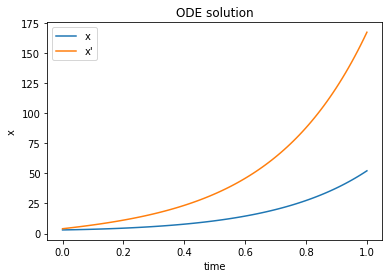

In [0]:
def time_func(t):
  """
    currently, t is set as in ode of task2 (q)
  """
  return t

def pass_ode(y, t, k, coefs, b0):
  """
  function for passing to odeint

  k - degree of ode
  coefs - the following list of coefficients: [a_k, a_{k-1}, ..., a_1, a_0]
  b0 - free coefficient 
  """
  dydt = y[1:]
  last = b0/coefs[0] - y.dot(np.flip(coefs)[:-1]) / coefs[0] + time_func(t) / coefs[0]
  dydt = np.append(dydt, last)
  return dydt

def ode_odeint(k, coefs, b0, y0s):
  """
    k - degree of ODE
    coefs - the following list of coefficients: [a_k, a_{k-1}, ..., a_1, a_0]
    b0 - free coefficient
    y0s - list of initial values: [y^{k-1}(0), y^{k-2}(0), ..., y'(0), y(0)] 
  """
  t = np.linspace(0, 1, 100)
  sol = odeint(pass_ode, y0s[::-1], t, args=(k, coefs, b0))
  return sol 


#Testing on ode from task2 (q)
x = ode_odeint(2, [1, -1, -7], 3, [4, 3])
t = np.linspace(0, 1, 100)

plt.plot(t, x[:, 0], label = 'x')
plt.plot(t, x[:, 1], label = "x'")
plt.xlabel('time')
plt.ylabel('x')
plt.title("ODE solution")
plt.legend(loc='best')

## State Space



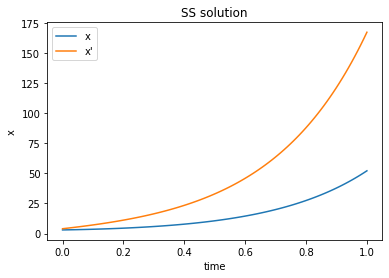

In [0]:
def pass_ss(y, t, A, B, k):
  """
  function for passing to odeint

  A and B are matrecies from SS
  k - degree of ODE
  """
  dydt = np.add(A.dot(y), B)
  T = np.zeros(k)
  T[k-1] = time_func(t)
  dydt = np.add(dydt, T)
  return dydt

def ss_odeint(k, A, B, y0s):
  """
    k - degree of ODE
    coefs - the following list of coefficients: [a_k, a_{k-1}, ..., a_1, a_0]
    b0 - free coefficient
    y0s - list of initial values: [y^{k-1}(0), y^{k-2}(0), ..., y'(0), y(0)] 
  """
  t = np.linspace(0, 1, 100)
  sol = odeint(pass_ss, y0s[::-1], t, args=(A, B, k))
  return sol 

#Testing on ode from task2 (q)
A, B = doe_to_ss(2, [1, -1, -7], 3)
x = ss_odeint(2, A, B, [4, 3])
t = np.linspace(0, 1, 100)

plt.plot(t, x[:, 0], label = 'x')
plt.plot(t, x[:, 1], label = "x'")
plt.xlabel('time')
plt.ylabel('x')
plt.title("SS solution")
plt.legend(loc='best')

# Stability

In [0]:
val, vec = np.linalg.eig(A)

print("evals: ", val)
print("evecs: ", vec)

evals:  [-2.1925824  3.1925824]
evecs:  [[-0.41496214 -0.29890615]
 [ 0.90983868 -0.95428251]]


Looking at the graph (which is continuously increasing) and at eigenvalues (1 positive), we can say that the system is unstable. Hence, the solution diverges.